### Option E – Attack Method Detection Part 1

This option deals with creating a method to detect the following attack methods:  
** Chart and Graph by date, the following based on source IP and country. **

#### 2. Search for attempts where a website/webserver is being used that potentially hosts malware

In [36]:
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.height', 100)

In [37]:
tracker=[]

# define check function
def chk3(chkdf,  searchlist,  dfname, arr=tracker):
    pd.set_option('display.max_rows', 500)
    for i in range(8, len(chkdf.columns), 1):
        result = chkdf[chkdf.iloc[:,i].str.contains(searchlist).fillna(False)]         
        if result.iloc[:,1].count() != 0:
            print("Found <",searchlist,"> in column <", chkdf.columns[i],"> count",result.iloc[:,1].count())
            tracker.append([dfname,searchlist,chkdf.columns[i],result.iloc[:,1].count()])
            return (result[['timestamp','source_ip','country','asn',chkdf.columns[i]]])
            

### Shockpot

In [38]:
dfs = pd.read_csv("sorted-shockpot.csv",sep='\t', lineterminator='\r',dtype='str')
dfs = dfs.loc[:,['timestamp','source_ip',
       'city', 'province', 'province_code', 'country', 'country_code','asn', 'method', 'path', 'URL',
       'query_string', 'Authorization', 'Content-Type', 'Cookie', 'Host', 'Connection',
       'Te', 'Accept-Encoding', 'User Agent', 'X_Forwarded_For',
       'X_Requested_With', 'is-shellshock']].fillna("")
dfs = dfs.drop(dfs.index[5284])

# list of keywords i'm finding
# https://andreafortuna.org/cybersecurity/how-a-malware-can-download-a-remote-payload-and-execute-malicious-code-in-one-line/
# https://arstechnica.com/information-technology/2018/04/nasty-malware-campaign-using-thousands-of-hacked-sites-hid-for-months/
# https://www.opswat.com/blog/hacking-pictures-stegosploit-and-how-stop-it - malware by images
mylist = {'curl','wget','auto_prepend','\.sh','fetch','dropbox','\.exe[^c]', 
         'cmd','cscript','mshta','rundll32','regsv','msbuild','regasm','\.hta','\.vbs','\.xml','\.bat','\.jpg','\.gif','\.png','\.bmp',
          '\.php(?!$)(?!.*( |UNION))',
         '\.xlsx','\.doc','\.docx','\.ppt','\.pptx','\.pdf','\.msi','jquery','javascript','\.zip','\.rar','\.7z'}


dfs_1 = pd.DataFrame()
for ix in mylist:
    dfs_1 = pd.concat([dfs_1,chk3(dfs,ix,'shockpot')]).reset_index(drop=True)
dfs_1 = dfs_1.drop_duplicates()

Found < curl > in column < Content-Type > count 2
Found < \.jpg > in column < path > count 7
Found < wget > in column < path > count 4
Found < \.exe[^c] > in column < Content-Type > count 6
Found < cmd > in column < path > count 15
Found < fetch > in column < Content-Type > count 2
Found < \.xml > in column < path > count 21
Found < \.sh > in column < path > count 16
Found < auto_prepend > in column < URL > count 6
Found < \.php(?!$)(?!.*( |UNION)) > in column < path > count 1


C:\Users\andyl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


In [39]:
dfs_1[dfs_1.path.str.contains("\.php(?!.*( |UNION))").fillna(False)].path.values

C:\Users\andyl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array(['/login.php/'], dtype=object)

In [40]:
dfs_1[dfs_1.path.str.contains('\.jpg').fillna(False)]

,Content-Type,URL,asn,country,path,source_ip,timestamp
2,NaN,NaN,Amazon.com - Inc.,Singapore,/your/killing/me/smalls.jpg,54.254.192.52,2016-12-19 04:13:33.369
3,NaN,NaN,Amazon.com - Inc.,Ireland,/your/killing/me/smalls.jpg,52.213.49.116,2016-12-19 05:55:13.118
4,NaN,NaN,Amazon.com - Inc.,Republic of Korea,/your/killing/me/smalls.jpg,52.78.239.136,2016-12-19 05:56:57.567
5,NaN,NaN,Amazon.com - Inc.,Brazil,/your/killing/me/smalls.jpg,52.67.235.59,2016-12-19 06:21:09.072
6,NaN,NaN,Amazon.com - Inc.,Australia,/your/killing/me/smalls.jpg,13.54.96.132,2016-12-19 06:30:10.067
7,NaN,NaN,Amazon.com - Inc.,United States,/your/killing/me/smalls.jpg,35.165.183.179,2016-12-19 06:40:03.397
8,NaN,NaN,Amazon.com - Inc.,India,/your/killing/me/smalls.jpg,35.154.206.118,2017-08-31 03:08:14.747


### Elastic

In [41]:
dfe = pd.read_csv("sorted-elastichoney.csv",sep='\t',dtype='str')
dfe=dfe[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn','method','type',
        'URL','form','user_agent','Payload Connection','Payload','Payload Resource','Payload MD5']]

dfe_1 = pd.DataFrame()
for ix in mylist:
    dfe_1 = pd.concat([dfe_1,chk3(dfe,ix,'Elastic')]).reset_index(drop=True)
dfe_1 = dfe_1.drop_duplicates()

Found < curl > in column < URL > count 3
Found < wget > in column < URL > count 5


C:\Users\andyl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


In [42]:
dfe_1.source_ip.value_counts()

171.92.208.42    4
222.186.134.8    2
123.249.27.46    2
Name: source_ip, dtype: int64

***
### Glastopf  

In [43]:
dfg = pd.read_csv("sorted-glastopf.csv",sep='\t',dtype='str')
dfg=dfg[['timestamp','channel','source_ip','destination_port',
        'protocol','city','country','asn','Version','pattern',
        'filename','request_raw','request_url']]
dfg_1 = pd.DataFrame()
for ix in mylist:
    dfg_1 = pd.concat([dfg_1,chk3(dfg,ix,'Glastopf')]).reset_index(drop=True)
dfg_1 = dfg_1.drop_duplicates()

Found < curl > in column < request_raw > count 10
Found < wget > in column < request_raw > count 16
Found < \.exe[^c] > in column < request_raw > count 33
Found < cmd > in column < request_raw > count 24
Found < fetch > in column < request_raw > count 1
Found < \.xml > in column < request_raw > count 12
Found < \.sh > in column < request_raw > count 15
Found < auto_prepend > in column < request_raw > count 3
Found < \.gif > in column < request_raw > count 4
Found < \.php(?!$)(?!.*( |UNION)) > in column < request_url > count 134


C:\Users\andyl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


In [44]:
dfg_1[dfg_1.request_raw.str.contains('\.gif').fillna(False)].request_raw.values

array(['GET /manager/images/tomcat.gif HTTP/1.1, Accept: image/webp,*/*;q=0.8, Accept-Encoding: gzip,deflate,sdch, Accept-Language: zh-CN,zh;q=0.8,zh-TW;q=0.6,en;q=0.4, Connection: keep-alive, Host: 192.168.10.6, Referer: http://192.168.10.6/manager/html, User-Agent: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.149 Safari/537.36',
       'GET /manager/images/asf-logo.gif HTTP/1.1, Accept: image/webp,*/*;q=0.8, Accept-Encoding: gzip,deflate,sdch, Accept-Language: zh-CN,zh;q=0.8,zh-TW;q=0.6,en;q=0.4, Connection: keep-alive, Host: 192.168.10.6, Referer: http://192.168.10.6/manager/html, User-Agent: Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/33.0.1750.149 Safari/537.36',
       'GET /manager/images/asf-logo.gif HTTP/1.1, Accept: image/png,image/*;q=0.8,*/*;q=0.5, Accept-Encoding: gzip, deflate, Accept-Language: ja,en-US;q=0.7,en;q=0.3, Connection: keep-alive, Host: 192.168.10.6, Referer: http://192.168.10.6/manager/htm

In [45]:
g1 = pd.concat([dfs_1.source_ip, dfe_1.source_ip, dfg_1.source_ip]).value_counts()

In [46]:
g1_type_X = g1.index
g1_type_y = g1.values

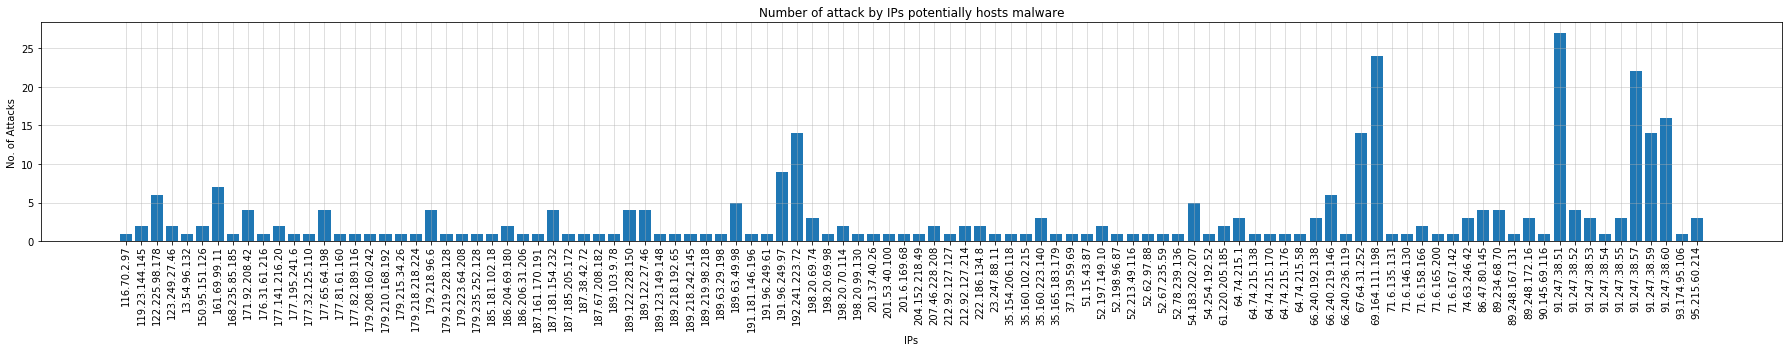

In [47]:
import matplotlib.pyplot as plt

plt.bar(g1_type_X, g1_type_y)
plt.gcf().set_size_inches(25, 5)
plt.title("Number of attack by IPs potentially hosts malware")
plt.ylabel("No. of Attacks")
plt.xlabel("IPs")
plt.xticks(rotation=90)
plt.grid(True,alpha=.5)
plt.tight_layout()
plt.rcParams['xtick.major.pad']='0'
plt.tight_layout()
plt.savefig("OE2Attack_byIPs.png")    
plt.show()

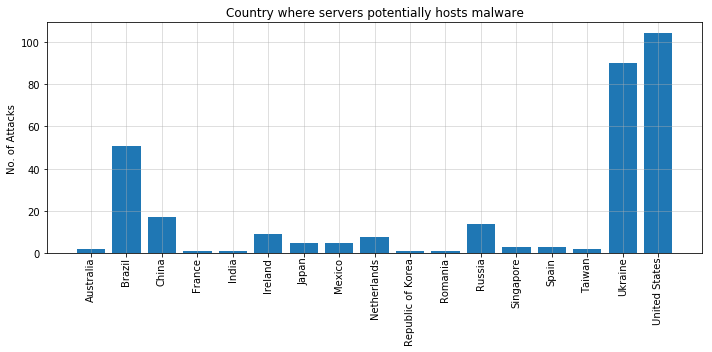

In [48]:
g2_type_X = pd.concat([dfs_1.country, dfe_1.country, dfg_1.country]).value_counts().index
g2_type_y = pd.concat([dfs_1.country, dfe_1.country, dfg_1.country]).value_counts().values

import matplotlib.pyplot as plt

plt.bar(g2_type_X, g2_type_y)
plt.title("Country where servers potentially hosts malware")
plt.ylabel("No. of Attacks")
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=90)
plt.grid(True,alpha=.5)
plt.tight_layout()
plt.savefig("OE2Attack_byCountries.png")    

plt.show()

In [49]:
df_tracker = pd.DataFrame(tracker,columns=['honeypot','regex','orig_col','attacks'])
df_tracker

,honeypot,regex,orig_col,attacks
0,shockpot,curl,Content-Type,2
1,shockpot,\.jpg,path,7
2,shockpot,wget,path,4
3,shockpot,\.exe[^c],Content-Type,6
4,shockpot,cmd,path,15
5,shockpot,fetch,Content-Type,2
6,shockpot,\.xml,path,21
7,shockpot,\.sh,path,16
8,shockpot,auto_prepend,URL,6
9,shockpot,\.php(?!$)(?!.*( |UNION)),path,1


In [50]:
df_tracker.groupby('regex')['attacks'].sum()

regex
\.exe[^c]                     39
\.gif                          4
\.jpg                          7
\.php(?!$)(?!.*( |UNION))    135
\.sh                          31
\.xml                         33
auto_prepend                   9
cmd                           39
curl                          15
fetch                          3
wget                          25
Name: attacks, dtype: int64

In [51]:
g3_type_X = df_tracker.groupby('regex')['attacks'].sum().index
g3_type_y = df_tracker.groupby('regex')['attacks'].sum().values

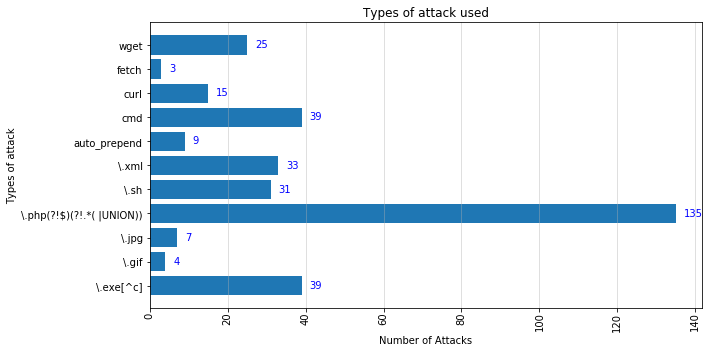

In [52]:
plt.barh(g3_type_X, g3_type_y)
plt.title("Types of attack used")
plt.xlabel("Number of Attacks")
plt.ylabel("Types of attack")
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=90)
plt.grid(True,axis='x',alpha=.5)
for i, v in enumerate(g3_type_y):
    plt.text(v + 2, i-.1 , str(v), color='blue',)
plt.tight_layout()
plt.savefig("OE2Attack_types_used.png")    

plt.show()